In [ ]:
!nvidia-smi
from google.colab import drive
drive.mount('/content/drive')

Mon May  8 05:43:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download datasets

In [ ]:
# data smart menu +  VinAI
!git clone https://github.com/dotrannhattuong/Menu_Dataset

In [ ]:
# data vietocr
!git clone https://github.com/dotrannhattuong/datasetOCR.git

Cloning into 'datasetOCR'...
remote: Enumerating objects: 1184973, done.
remote: Counting objects: 100% (386504/386504), done.
remote: Compressing objects: 100% (267707/267707), done.
remote: Total 1184973 (delta 1421), reused 386499 (delta 1418), pack-reused 798469
Receiving objects: 100% (1184973/1184973), 7.07 GiB | 33.99 MiB/s, done.
Resolving deltas: 100% (1487/1487), done.
Updating files: 100% (1202569/1202569), done.


In [ ]:
! wget https://vocr.vn/data/vietocr/data_line.zip
! unzip -qq -o ./data_line.zip

--2023-02-21 04:18:35--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  11.5MB/s    in 6.5s    

2023-02-21 04:18:43 (9.02 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



# 1. VietOCR

# 1.1 Generate vietocr-based pretrained recognition 

In [ ]:
!git clone https://github.com/pbcquoc/vietocr.git

Cloning into 'vietocr'...
remote: Enumerating objects: 3169, done.
remote: Counting objects: 100% (533/533), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 3169 (delta 501), reused 481 (delta 481), pack-reused 2636
Receiving objects: 100% (3169/3169), 2.08 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (2376/2376), done.


In [ ]:
!pip install lion_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --quiet vietocr

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.1/306.1 KB 10.1 MB/s eta 0:00:00


In [ ]:
%cd /content/vietocr
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

/content/vietocr


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
with open('/content/datasetOCR/vi_vietnam.txt') as file_label:
  character = file_label.readlines()
  character = [i.replace('\n', '') for i in character]
print(''.join(character))
print(len(''.join(character)))

AÁÀẠẢÃĂẮẰẲẶẴÂẤẦẨẪẬBCDĐEÈÉẼẺẸÊẾỀỂỄỆFGHIÍÌỈĨỊJKLMNOÒÓỎÕỌÔỐỒỔỖỘƠỚỜỠỞỢPQRSTUÙÚỦŨỤƯỪỨỬỮỰVXYỴÝỲỶỸWZaáàạảãăằắẳẵặâấầẩẫậbcdđeèéẻẽẹêếềểễệfghiíìỉĩịjklmnoòóỏõọôốồổỗộơớờởỡợpqrstuùúủũụưừứửữựvyỳýỷỹỵxwz0123456789'",.()-%@!/:+?&\[]=*#<>
219


In [ ]:
dataset_params = {
    'name':'ocr',
    'data_root':'/content/datasetOCR/',
    'train_annotation':'train_dataocr.txt',
    'valid_annotation':'val_dataocr.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':1,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
config['dataloader']['num_workers'] = 1
config['trainer']['batch_size'] = 32
# config['vocab'] = ''.join(character)

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 1,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'ocr',
  'data_root': '/content/datasetOCR/',
  'train_annotation': 'train_dataocr.txt',
  'valid_annotation': 'val_dataocr.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_m

In [ ]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
train_ocr exists. Remove folder if you want to create new dataset


train_ocr build cluster: 100%|███████████████████████████| 481024/481024 [00:06<00:00, 71260.27it/s]

valid_ocr exists. Remove folder if you want to create new dataset



valid_ocr build cluster: 100%|███████████████████████████| 120256/120256 [00:01<00:00, 97433.55it/s]


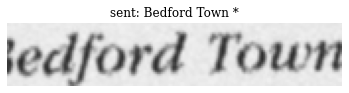

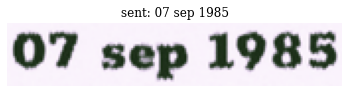

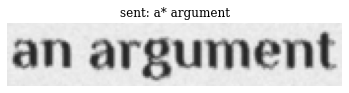

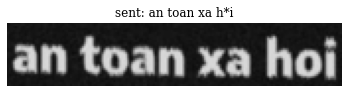

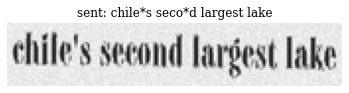

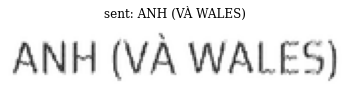

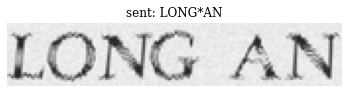

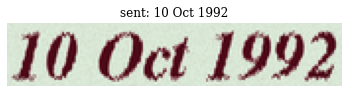

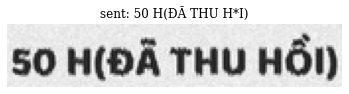

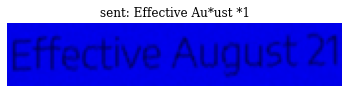

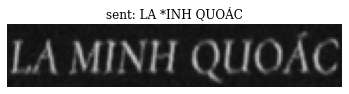

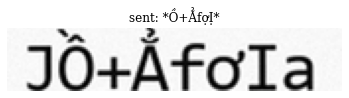

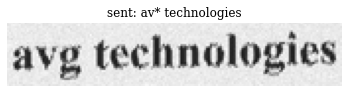

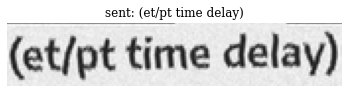

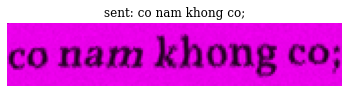

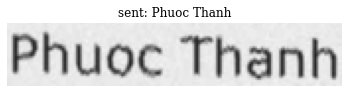

In [ ]:
trainer.visualize_dataset()

In [ ]:
trainer.config.save('config.yml')

In [ ]:
trainer.train()

# 2. PPOCR

# 2.1. Data preprocessing

In [ ]:
!gdown --id 1_s-cOE6bVh1tL4Ti0R8syhHtbAcL1x8Z

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_s-cOE6bVh1tL4Ti0R8syhHtbAcL1x8Z
To: /content/Menu_Dataset-main.zip
100% 1.83G/1.83G [00:10<00:00, 172MB/s]


In [ ]:
!unzip /content/Menu_Dataset-main.zip

Streaming output truncated to the last 5000 lines.
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_42.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_61.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_63.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_70.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_71.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_73.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1554_74.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1556_7.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1557_1.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1557_10.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1557_20.jpg  
  inflating: Menu_Dataset-main/dataset_rec/unseen_test_images/im1558_0.jpg  
  inflating: Men

In [ ]:
!pip install -U pip
!pip install git+https://github.com/cleanlab/cleanvision.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cleanlab/cleanvision.git to /tmp/pip-req-build-dhw9j2kr
  Running command git clone --filter=blob:none --quiet https://github.com/cleanlab/cleanvision.git /tmp/pip-req-build-dhw9j2kr
  Resolved https://github.com/cleanlab/cleanvision.git to commit c18e9a6d78c81564eb547131b42c76bc1180b0e2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.

Reading images from /content/Menu_Dataset-main/dataset_rec
Sample images from the dataset


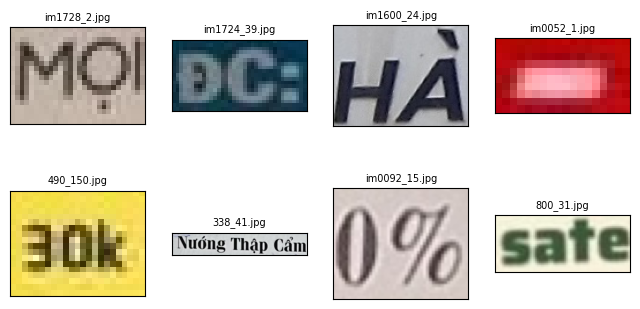

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|██████████| 64741/64741 [01:04<00:00, 1006.90it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().


In [ ]:
from cleanvision.imagelab import Imagelab

# Path to your dataset, you can specify your own dataset path
dataset_path = "/content/Menu_Dataset-main/dataset_rec"

# Initialize imagelab with your dataset
imagelab = Imagelab(data_path=dataset_path)

# Visualize a few sample images from the dataset
imagelab.visualize(num_images=8)

# Find issues
imagelab.find_issues()

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_aspect_ratio |        14761 |
|  1 | dark             |         1208 |
|  2 | blurry           |          308 |
|  3 | near_duplicates  |          225 |
|  4 | low_information  |           34 |
|  5 | exact_duplicates |            8 |
|  6 | light            |            6 | 


Top 4 examples with odd_aspect_ratio issue in the dataset.


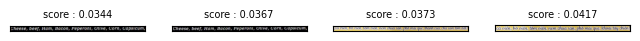


Top 4 examples with dark issue in the dataset.


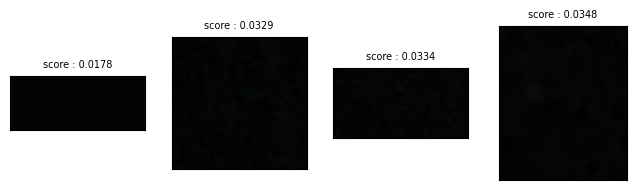


Top 4 examples with blurry issue in the dataset.


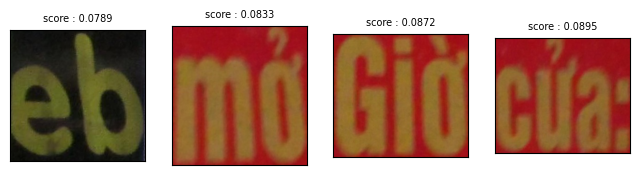


Top 4 sets of images with near_duplicates issue
Set: 0


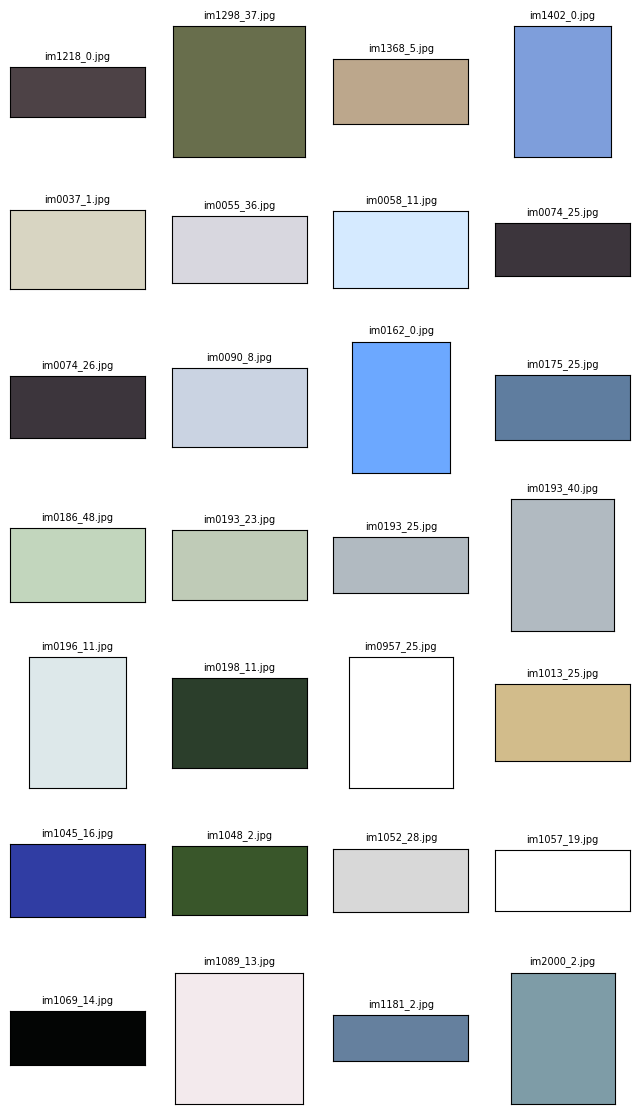

Set: 1


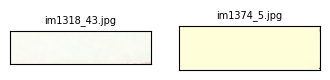

Set: 2


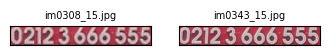

Set: 3


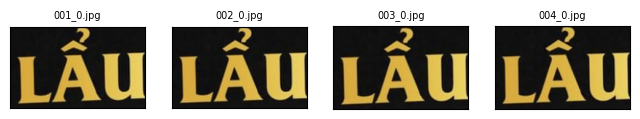


Top 4 examples with low_information issue in the dataset.


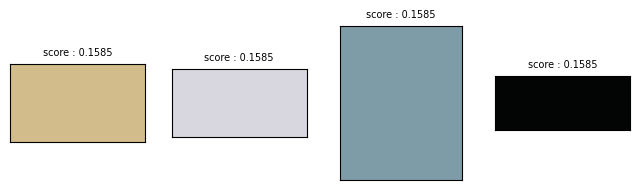


Top 4 sets of images with exact_duplicates issue
Set: 0


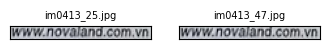

Set: 1


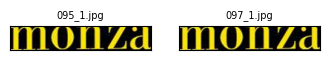

Set: 2


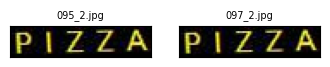

Set: 3


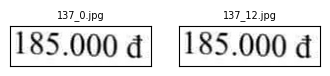


Top 4 examples with light issue in the dataset.


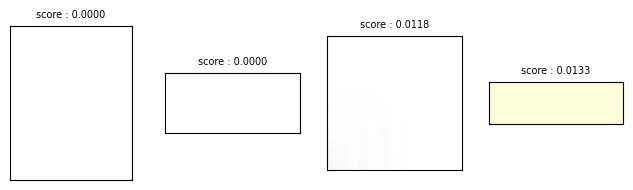

In [ ]:
imagelab.report()

In [ ]:
imagelab.issue_summary

,issue_type,num_images
0,odd_aspect_ratio,14761
1,dark,1208
2,blurry,308
3,near_duplicates,225
4,low_information,34
5,exact_duplicates,8
6,light,6
7,grayscale,0


In [ ]:
imagelab.issues

,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,is_exact_duplicates_issue,is_near_duplicates_issue
/content/Menu_Dataset-main/dataset_rec/test_image/im1201_0.jpg,0.794118,False,0.833682,False,0.578514,False,1,False,0.872891,False,0.551598,False,False,False
/content/Menu_Dataset-main/dataset_rec/test_image/im1201_1.jpg,0.880952,False,0.844649,False,0.564803,False,1,False,0.887424,False,0.540258,False,False,False
/content/Menu_Dataset-main/dataset_rec/test_image/im1201_2.jpg,0.673913,False,0.831004,False,0.554402,False,1,False,0.904542,False,0.563432,False,False,False
/content/Menu_Dataset-main/dataset_rec/test_image/im1201_3.jpg,0.348837,True,0.801205,False,0.475139,False,1,False,0.899240,False,0.354498,False,False,False
/content/Menu_Dataset-main/dataset_rec/test_image/im1201_4.jpg,0.301370,True,0.788123,False,0.475485,False,1,False,0.897068,False,0.376457,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/Menu_Dataset-main/dataset_rec/unseen_test_images/im2000_5.jpg,0.410256,False,0.811462,False,0.801780,False,1,False,0.570717,False,0.459472,False,False,False
/content/Menu_Dataset-main/dataset_rec/unseen_test_images/im2000_6.jpg,0.428571,False,0.803465,False,0.778726,False,1,False,0.603558,False,0.402110,False,False,False
/content/Menu_Dataset-main/dataset_rec/unseen_test_images/im2000_7.jpg,0.488636,False,0.794845,False,0.772371,False,1,False,0.590857,False,0.411029,False,False,False
/content/Menu_Dataset-main/dataset_rec/unseen_test_images/im2000_8.jpg,0.520000,False,0.811200,False,0.759449,False,1,False,0.618715,False,0.425494,False,False,False


In [ ]:
imagelab.info['exact_duplicates']['num_sets']

4

In [ ]:
imagelab.info['exact_duplicates']['sets']

[['/content/Menu_Dataset-main/dataset_rec/train_images/im0413_25.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0413_47.jpg'],
 ['/content/Menu_Dataset-main/dataset_rec/train_images_menu/095_1.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images_menu/097_1.jpg'],
 ['/content/Menu_Dataset-main/dataset_rec/train_images_menu/095_2.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images_menu/097_2.jpg'],
 ['/content/Menu_Dataset-main/dataset_rec/train_images_menu/137_0.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images_menu/137_12.jpg']]

In [ ]:
imagelab.info['near_duplicates']['sets']

[['/content/Menu_Dataset-main/dataset_rec/test_image/im1218_0.jpg',
  '/content/Menu_Dataset-main/dataset_rec/test_image/im1298_37.jpg',
  '/content/Menu_Dataset-main/dataset_rec/test_image/im1368_5.jpg',
  '/content/Menu_Dataset-main/dataset_rec/test_image/im1402_0.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0037_1.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0055_36.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0058_11.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0074_25.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0074_26.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0090_8.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0162_0.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0175_25.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0186_48.jpg',
  '/content/Menu_Dataset-main/dataset_rec/train_images/im0193_23.jpg',
  '/content/Menu_Dat

In [ ]:
# remove duplicated datasets
import numpy as np


list_exact_duplicates = np.array(imagelab.info['exact_duplicates']['sets'])
list_near_duplicates = np.array(imagelab.info['near_duplicates']['sets'])


list_duplicates = np.concatenate((list_exact_duplicates.reshape(8, ), list(np.concatenate(list_near_duplicates).flat)), axis=0)
list_duplicates = list_duplicates.flatten()

<ipython-input-13-a494039b6918>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_near_duplicates = np.array(imagelab.info['near_duplicates']['sets'])


In [ ]:
print(len(list_duplicates))

233


In [ ]:
print(len(list_duplicates) == len(list_exact_duplicates.reshape(8, )) + len(list(np.concatenate(list_near_duplicates).flat)))

True


In [ ]:
import os

lmao_read = open('/content/Menu_Dataset-main/dataset_rec/val_datacrop.txt', 'r')
datas = lmao_read.readlines()
lmao_write = open('/content/Menu_Dataset-main/dataset_rec/train_datacrop.txt', 'w')
for data in datas:
    data_info = os.path.join('/content/Menu_Dataset-main/dataset_rec', data.split('\t')[0])
    if data_info not in list_duplicates:
        lmao_write.write(data)
    else:
        print(data)
    #print(data_info)

In [ ]:
import os 

# clean image's noise and label's noise 
list_not_duplicates = []
main_folder = '/content/Menu_Dataset-main/dataset_rec'
folder_results = '/content/Menu_Dataset-main/dataset_rec_filter'

if not os.path.exists(folder_results):
    os.makedirs(folder_results)

for item in os.listdir(main_folder):
  # clean image's noise

  if os.path.isdir(os.path.join(main_folder, item)):
    for file in os.listdir(os.path.join(main_folder, item)):
      if os.path.join(main_folder, item, file) in list_duplicates:
        os.remove(os.path.join(main_folder, item, file))

  # clean label's noise

  elif os.path.isfile(os.path.join(main_folder, item)):
      if os.path.splitext(os.path.join(main_folder, item))[1] == '.txt':
        read_file = open(os.path.join(main_folder, item), 'r')
        texts = read_file.readlines()
        write_file = open(os.path.join(folder_results, item), 'w')
        for data in datas:
          data_info = os.path.join(main_folder, data.split('\t')[0])
          if data_info not in list_duplicates:
              write_file.write(data)

In [ ]:
print(len(list_not_duplicates) == len(os.listdir(dataset_path)))

True


In [ ]:
!mv /content/Menu_Dataset-main/dataset_rec/unseen_test_images /content/Menu_Dataset-main/dataset_rec_filter
!mv /content/Menu_Dataset-main/dataset_rec/train_images_menu /content/Menu_Dataset-main/dataset_rec_filter
!mv /content/Menu_Dataset-main/dataset_rec/train_images_char /content/Menu_Dataset-main/dataset_rec_filter
!mv /content/Menu_Dataset-main/dataset_rec/train_images /content/Menu_Dataset-main/dataset_rec_filter
!mv /content/Menu_Dataset-main/dataset_rec/test_image /content/Menu_Dataset-main/dataset_rec_filter

# 2. Train

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46312, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 46312 (delta 91), reused 96 (delta 53), pack-reused 46134
Receiving objects: 100% (46312/46312), 339.29 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (32539/32539), done.
Updating files: 100% (1620/1620), done.


In [ ]:
!python -m pip install paddlepaddle-gpu==2.4.2.post117 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.3/557.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 43.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.9.0 requires protobuf!=3.20.0,!=3.

In [ ]:
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install PyYAML==5.4.1
!pip3 install paddleslim==2.2.2
!pip install split-folders
!pip3 install lanms-nova

/content/PaddleOCR
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 40.

In [ ]:
%cd /content
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar

# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar

/content
--2023-05-08 08:31:53--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 36.110.192.138, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|36.110.192.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204093440 (195M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’

en_PP-OCRv3_rec_tra 100%[===================>] 194.64M  31.4MB/s    in 13s     

2023-05-08 08:32:07 (15.5 MB/s) - ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’ saved [204093440/204093440]

/content/pretrain_models


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py \
 -c /content/Menu_Dataset-main/config/rec_ppocrv3.yml \
 -o Global.pretrained_model=/content/pretrain_models/en_PP-OCRv3_rec_train/best_accuracy \
  Global.character_dict_path=/content/Menu_Dataset-main/dictionary/ppocr_dict.txt \
  Global.save_model_dir=/content/drive/MyDrive/Colab_Notebooks/weight-smart-menu

/content/PaddleOCR
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.core
/usr/lib/python3.10/distutils/command/build_scripts.py:7: DeprecationWarning: The distutils.sysconfig module is deprecated, use sysconfig instead
  from distutils import sysconfig
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-nam

# 3. Convert trained model to file.nb embedding on mobile phone

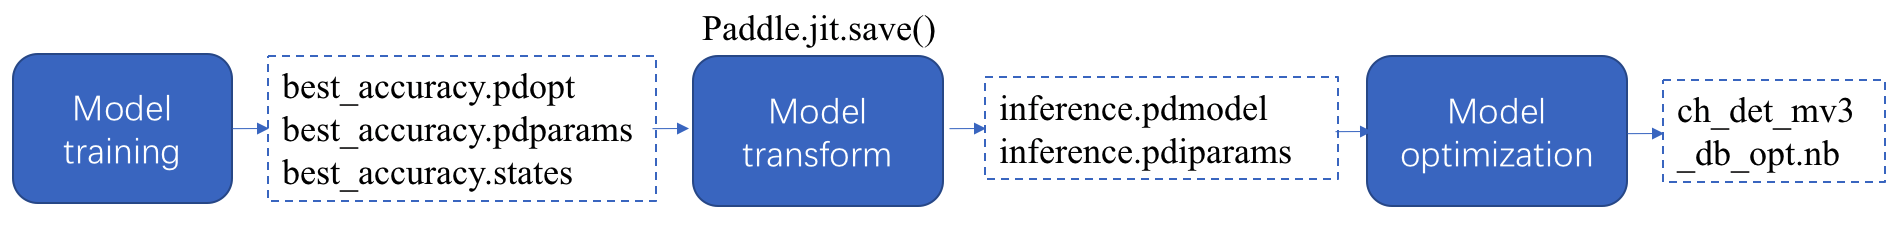

In [ ]:
!pip install paddlelite # The paddlelite version should be the same as the prediction library version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 2.1 MB/s eta 0:00:00


In [ ]:
!paddle_lite_opt --model_file=./ch_PP-OCRv3_rec_slim_infer/inference.pdmodel  --param_file=./ch_PP-OCRv3_rec_slim_infer/inference.pdiparams  --optimize_out=./ch_PP-OCRv3_rec_slim_opt --valid_targets=arm  --optimize_out_type=naive_buffer